In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,020,994 (64.93 MB)

 Trainable params: 17,020,290 (64.93 MB)

 Non-trainable params: 704 (2.75 KB)

# Data Preparation

In [ ]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

## Data Labelling

In [ ]:
folder_path = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/training_data'
# List to store recording names and labels
results = []
# Iterate through all files in the folder
for index, file_name in enumerate(os.listdir(folder_path), 1):
    # Check if the file is a TSV file
    if file_name.endswith('.tsv'):
        file_path = os.path.join(folder_path, file_name)
        # Read the TSV file
        df = pd.read_csv(file_path, sep='\t', header=None, names=['start_time', 'end_time', 'segment_id'])
        # Check if the file has more than two rows to ensure middle rows exist
        if len(df) > 2:
            # Select middle rows excluding the first and last
            middle_df = df.iloc[1:-1]
            # Check if there are any segments labeled as '0' in the middle rows
            if (middle_df['segment_id'] == 0).any():
                # Mark as noisy (1)
                results.append([file_name.replace('.tsv', ''), 1])
                # Print progress for recordings with noise in the middle rows
                print(f"[{index}] Noise detected in middle rows of: {file_name.replace('.tsv', '')}")
            else:
                # Mark as no noise (0)
                results.append([file_name.replace('.tsv', ''), 0])
                print(f"[{index}] No noise detected in middle rows of: {file_name.replace('.tsv', '')}")
        else:
            # Mark as no noise (0) for files with insufficient rows
            results.append([file_name.replace('.tsv', ''), 0])
            print(f"[{index}] Insufficient rows for middle row analysis in: {file_name.replace('.tsv', '')}")

output_df = pd.DataFrame(results)
output_file = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/labels.csv'
output_df.to_csv(output_file, index=False, header=False)

print(f"\nResults saved to: {output_file}")


[5] No noise detected in middle rows of: 85196_AV
[6] No noise detected in middle rows of: 85198_AV
[7] No noise detected in middle rows of: 85196_TV
[8] No noise detected in middle rows of: 85197_TV
[13] No noise detected in middle rows of: 85198_PV
[16] No noise detected in middle rows of: 85196_MV
[18] No noise detected in middle rows of: 85198_MV
[20] No noise detected in middle rows of: 85198_TV
[22] No noise detected in middle rows of: 85197_PV
[24] No noise detected in middle rows of: 85197_AV
[27] No noise detected in middle rows of: 85197_MV
[29] No noise detected in middle rows of: 85192_TV
[32] No noise detected in middle rows of: 85196_PV
[43] No noise detected in middle rows of: 85199_PV
[44] No noise detected in middle rows of: 85210_PV
[47] No noise detected in middle rows of: 85203_MV
[49] No noise detected in middle rows of: 85202_MV
[58] No noise detected in middle rows of: 85203_AV
[61] No noise detected in middle rows of: 85207_PV
[64] Noise detected in middle rows 

## Mel Spectrogram Conversion

In [ ]:

folder_path = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/training_data'

output_folder = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/training_img_spectrograms'

os.makedirs(output_folder, exist_ok=True)

# Parameters for Mel spectrogram
n_mels = 128  # Number of Mel bands
n_fft = 2048  # Length of the FFT window
hop_length = 512  # Number of samples between successive frames

# Iterate through all files in the folder
for index, file_name in enumerate(os.listdir(folder_path), 1):
    # Check if the file is a .wav file
    if file_name.endswith('.wav'):
        file_path = os.path.join(folder_path, file_name)

        # Load the audio file
        try:
            y, sr = librosa.load(file_path, sr=None)

            # Compute the Mel spectrogram
            mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

            # Convert to decibels
            mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)

            plt.figure(figsize=(2.56, 2.56), dpi=100)  # Adjusting the size to 256x256
            plt.axis('off')
            librosa.display.specshow(mel_spect_db, sr=sr, hop_length=hop_length, cmap='viridis')
            output_file = os.path.join(output_folder, file_name.replace('.wav', '.png'))
            plt.savefig(output_file, bbox_inches='tight', pad_inches=0, dpi=100)
            plt.close()

            print(f"[{index}] Mel spectrogram saved for: {file_name}")

        except Exception as e:
            print(f"[{index}] Error processing {file_name}: {e}")

print("\nMel spectrogram conversion completed.")


[2] Mel spectrogram saved for: 85198_AV.wav
[3] Mel spectrogram saved for: 85196_TV.wav
[10] Mel spectrogram saved for: 85197_MV.wav
[11] Mel spectrogram saved for: 85197_AV.wav
[12] Mel spectrogram saved for: 85196_MV.wav
[14] Mel spectrogram saved for: 85198_MV.wav
[15] Mel spectrogram saved for: 85196_AV.wav
[19] Mel spectrogram saved for: 85198_TV.wav
[21] Mel spectrogram saved for: 85197_PV.wav
[33] Mel spectrogram saved for: 85197_TV.wav
[35] Mel spectrogram saved for: 85192_TV.wav
[39] Mel spectrogram saved for: 85207_PV.wav
[40] Mel spectrogram saved for: 85202_MV.wav
[42] Mel spectrogram saved for: 85203_AV.wav
[45] Mel spectrogram saved for: 85202_AV.wav
[50] Mel spectrogram saved for: 85207_TV.wav
[56] Mel spectrogram saved for: 85210_AV.wav
[59] Mel spectrogram saved for: 85199_PV.wav
[60] Mel spectrogram saved for: 85207_AV.wav
[63] Mel spectrogram saved for: 85199_AV.wav
[68] Mel spectrogram saved for: 85203_MV.wav
[72] Mel spectrogram saved for: 85210_MV.wav
[73] Mel spe

## Target Distribution

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/labels.csv')
df

,file_name,target
0,85198_AV,0
1,85196_TV,0
2,85197_TV,0
3,85198_PV,0
4,85196_MV,0
...,...,...
3157,49610_AV,0
3158,49618_MV,0
3159,49595_MV,0
3160,49607_MV,0


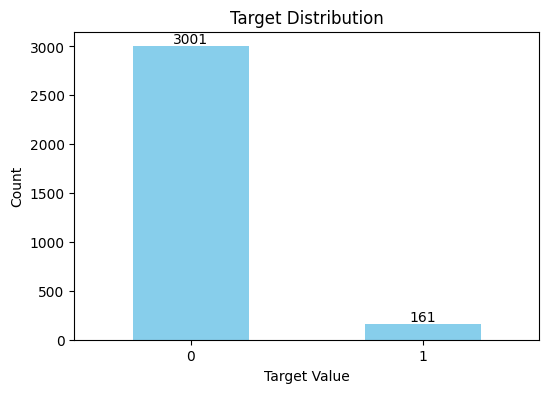

In [ ]:
import matplotlib.pyplot as plt
counts = df['target'].value_counts()
plt.figure(figsize=(6, 4))
ax = counts.plot(kind='bar', color='skyblue')
plt.title('Target Distribution')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'], rotation=0)
for idx, value in enumerate(counts):
    ax.text(idx, value, str(value), ha='center', va='bottom')

plt.show()


# Model 1

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

img_folder = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/training_img_spectrograms'
label_file = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/labels.csv'

labels = {}
with open(label_file, 'r') as f:
    next(f)
    for line in f:
        line = line.strip().split(',')
        labels[line[0]] = int(line[1])

# Load images and labels into arrays
X = []  # Images
y = []  # Labels

for img_file in os.listdir(img_folder):
    img_name = img_file.replace('.png', '')
    if img_name in labels:
        img_path = os.path.join(img_folder, img_file)
        # Load the image as RGB with the correct target size
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256), color_mode='rgb')
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        X.append(img_array)
        y.append(labels[img_name])

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalize the image data
X = X / 255.0

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Define the model architecture
model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=15
)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")




Epoch 1/15
80/80 [==============================] - 83s 1s/step - loss: 0.8304 - accuracy: 0.9328 - val_loss: 0.2946 - val_accuracy: 0.9321
Epoch 2/15
80/80 [==============================] - 79s 980ms/step - loss: 0.2343 - accuracy: 0.9442 - val_loss: 0.3086 - val_accuracy: 0.9368
Epoch 3/15
80/80 [==============================] - 78s 973ms/step - loss: 0.2035 - accuracy: 0.9466 - val_loss: 0.2219 - val_accuracy: 0.9526
Epoch 4/15
80/80 [==============================] - 77s 954ms/step - loss: 0.2095 - accuracy: 0.9462 - val_loss: 0.5154 - val_accuracy: 0.9415
Epoch 5/15
80/80 [==============================] - 77s 964ms/step - loss: 0.1983 - accuracy: 0.9466 - val_loss: 0.3455 - val_accuracy: 0.9400
Epoch 6/15
80/80 [==============================] - 76s 951ms/step - loss: 0.2026 - accuracy: 0.9466 - val_loss: 0.3126 - val_accuracy: 0.9589
Epoch 7/15
80/80 [==============================] - 77s 958ms/step - loss: 0.2049 - accuracy: 0.9466 - val_loss: 17.2665 - val_accuracy: 0.4676
E

20/20 [==============================] - 4s 184ms/step
AUC-ROC: 0.87
Confusion Matrix:
[[498 109]
 [  7  19]]


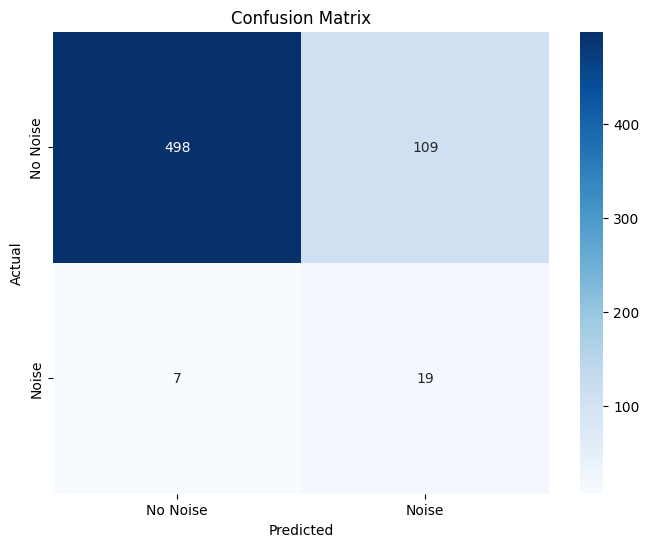

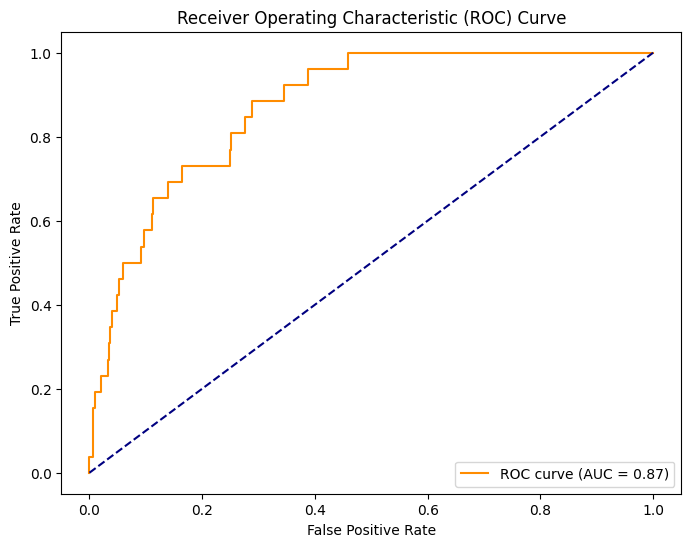

In [ ]:
# Predictions
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob[:, 1] >= 0.13).astype(int)

# AUC-ROC Calculation
auc_roc = roc_auc_score(y_val, y_pred_prob[:, 1])
print(f"AUC-ROC: {auc_roc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Noise', 'Noise'], yticklabels=['No Noise', 'Noise'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import seaborn as sns

# Define the CNN model
model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')  # Two classes: noisy (1) and non-noisy (0)
])

# Display the model architecture
model.summary()


Load in RGB (opencv)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8990 - loss: 0.2872 - val_accuracy: 0.9526 - val_loss: 0.2257
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9451 - loss: 0.2462 - val_accuracy: 0.9526 - val_loss: 0.1904
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9495 - loss: 0.2127 - val_accuracy: 0.9526 - val_loss: 0.1916
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9406 - loss: 0.2294 - val_accuracy: 0.9526 - val_loss: 0.1762
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9533 - loss: 0.1863 - val_accuracy: 0.9526 - val_loss: 0.1773
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9485 - loss: 0.2037 - val_accuracy: 0.9526 - val_loss: 0.1674
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9458 - loss: 0.1897 - val_accuracy: 0.9526 - val_loss: 0.1660
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9494 - loss: 0.1762 - val_accuracy: 0.9526 - val_

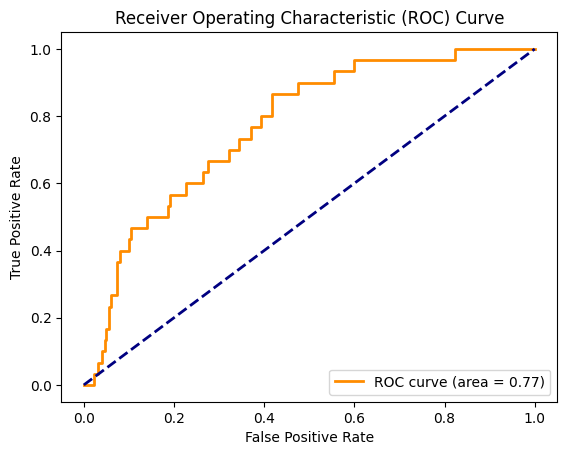

<Figure size 640x480 with 0 Axes>

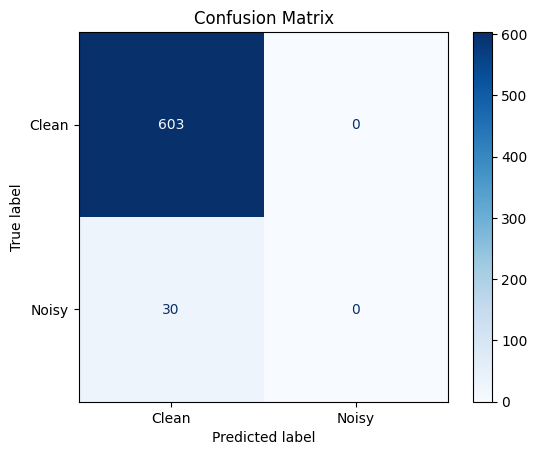

In [ ]:
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

labels_df = pd.read_csv('/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/labels.csv', header=None, names=['filename', 'label'])
labels_df['filename'] = labels_df['filename'] + '.png'  # Append .png to each filename
image_dir = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/training_img_spectrograms'

# Parameters
img_size = (128, 128)  # Resize images to 128x128
images = []
labels = []

for _, row in labels_df.iterrows():
    img_path = os.path.join(image_dir, row['filename'])
    if os.path.exists(img_path):
        # Load image using OpenCV
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)  # Resize to desired size
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = img / 255.0  # Normalize
        images.append(img)
        labels.append(row['label'])

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# CNN model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Predict probabilities and classes on the validation set
y_pred = model.predict(X_val).ravel()
y_pred_classes = (y_pred > 0.5).astype("int32")

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clean', 'Noisy'])

plt.figure()
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Model 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
model = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(256, 256, 1), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      67,109,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,795,649 (262.43 MB)

 Trainable params: 68,793,729 (262.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,                   # Training data and labels
    validation_data=(X_val, y_val),     # Validation data and labels
    epochs=10,                          # Number of epochs
    batch_size=32,                      # Batch size
    verbose=1                           # Show training progress
)


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3044s 38s/step - accuracy: 0.8755 - loss: 13.4963 - val_accuracy: 0.9494 - val_loss: 5.5549
Epoch 2/10
44/80 ━━━━━━━━━━━━━━━━━━━━ 21:22 36s/step - accuracy: 0.9105 - loss: 1.5246

20/20 [==============================] - 4s 217ms/step
AUC-ROC Score: 0.7345


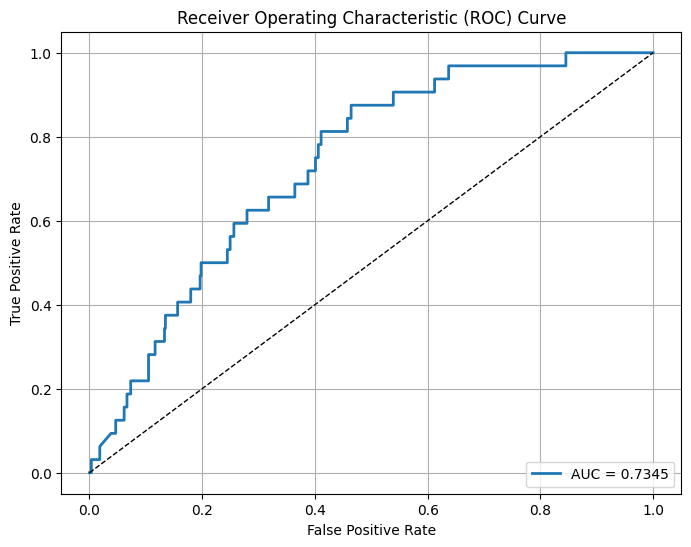

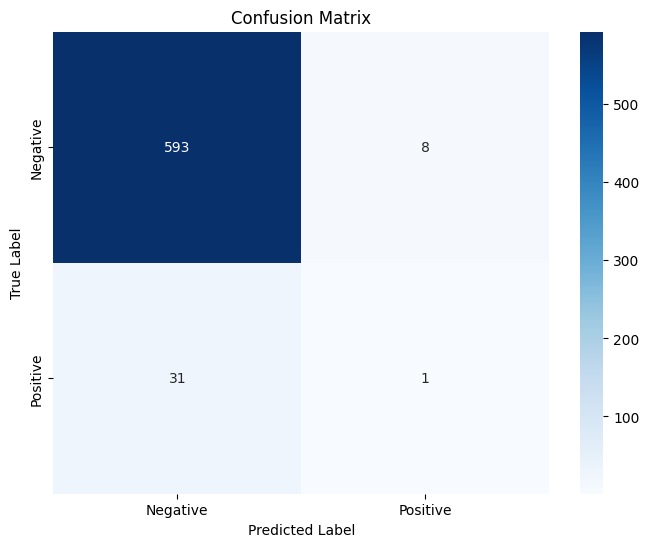

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       601
           1       0.11      0.03      0.05        32

    accuracy                           0.94       633
   macro avg       0.53      0.51      0.51       633
weighted avg       0.91      0.94      0.92       633



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities on the validation set
y_prob = model.predict(X_val).ravel()

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_val, y_prob)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convert predicted probabilities to binary class labels
y_pred = (y_prob > 0.5).astype("int32")

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_val, y_pred))


# Model 3

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import seaborn as sns

img_folder = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/training_img'
label_file = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/labels.csv'

labels = {}
with open(label_file, 'r') as f:
    for line in f:
        line = line.strip().split(',')
        labels[line[0]] = int(line[1])

# Load images and labels into arrays
X = []  # Images
y = []  # Labels

for img_file in os.listdir(img_folder):
    img_name = img_file.replace('.png', '')
    if img_name in labels:
        img_path = os.path.join(img_folder, img_file)
        # Load the image as grayscale
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256), color_mode='grayscale')
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        X.append(img_array)
        y.append(labels[img_name])

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalize the image data and reshape to add a channel dimension
X = X / 255.0
X = X.reshape(X.shape[0], 256, 256, 1)  # Adding a single channel dimension

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation for training set
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=10
)




Epoch 1/10
80/80 [==============================] - 56s 682ms/step - loss: 2.3912 - accuracy: 0.9174 - val_loss: 0.3840 - val_accuracy: 0.9494
Epoch 2/10
80/80 [==============================] - 53s 663ms/step - loss: 0.2221 - accuracy: 0.9482 - val_loss: 0.2276 - val_accuracy: 0.9494
Epoch 3/10
80/80 [==============================] - 53s 662ms/step - loss: 0.2257 - accuracy: 0.9490 - val_loss: 0.1927 - val_accuracy: 0.9494
Epoch 4/10
80/80 [==============================] - 54s 673ms/step - loss: 0.2221 - accuracy: 0.9490 - val_loss: 0.3312 - val_accuracy: 0.9494
Epoch 5/10
80/80 [==============================] - 53s 665ms/step - loss: 0.2146 - accuracy: 0.9490 - val_loss: 0.2620 - val_accuracy: 0.9494
Epoch 6/10
80/80 [==============================] - 53s 666ms/step - loss: 0.2185 - accuracy: 0.9490 - val_loss: 0.2017 - val_accuracy: 0.9494
Epoch 7/10
80/80 [==============================] - 53s 663ms/step - loss: 0.2093 - accuracy: 0.9486 - val_loss: 0.1991 - val_accuracy: 0.9494

20/20 [==============================] - 3s 129ms/step
AUC-ROC Score: 0.8181


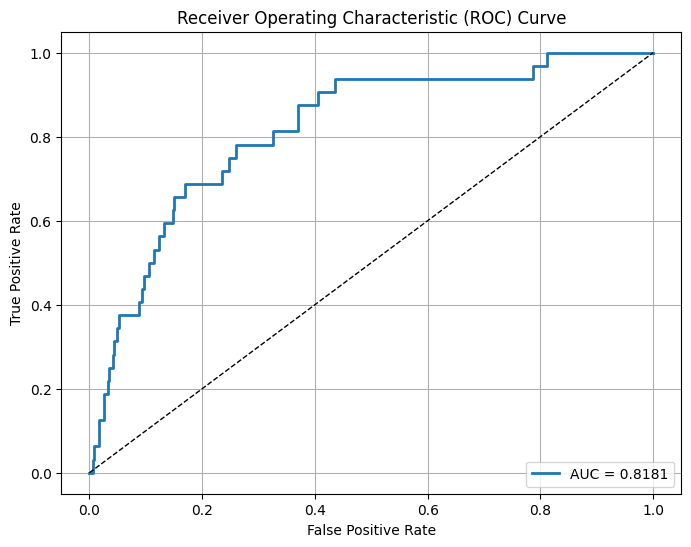

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       601
           1       0.00      0.00      0.00        32

    accuracy                           0.95       633
   macro avg       0.47      0.50      0.49       633
weighted avg       0.90      0.95      0.92       633



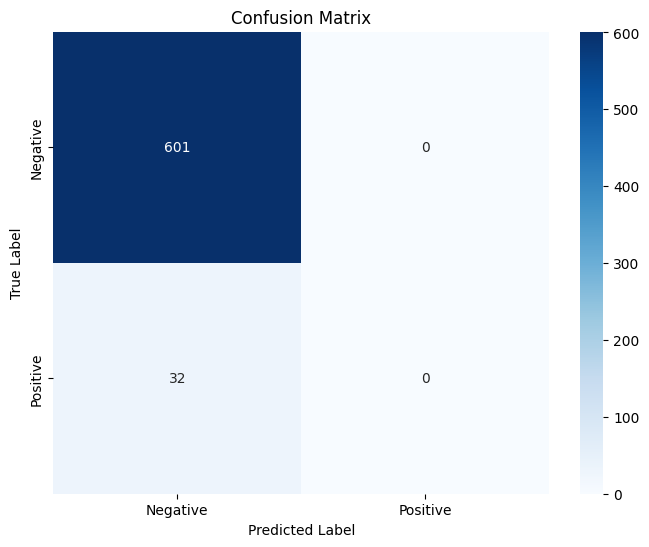

In [ ]:
# Predict probabilities on the validation set
y_prob = model.predict(X_val).ravel()

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_val, y_prob)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Evaluate the model on the validation set
y_pred = (y_prob > 0.5).astype("int32")
print(classification_report(y_val, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()